**EEP523 Spring 2020. Mobile Applications for Sensing and Control**

*April 30th, 2020*

**Week 5: Introduction to CNN with TensorFlow Lite for Android**

---
# Android App for Handwritten digit recognition
---

In this class activity, you will build and train a convolutional neural network (CNN) for classification of digits from the well-known MNIST dataset.

Then, you will incorporate that model into an Android App to perform
handwritten digits recognition.

Training is much faster using GPU acceleration. Before you proceed, ensure you are using a GPU runtime by going to Runtime -> Change runtime type and selecting GPU. Training will take around 5 minutes on a GPU runtime.


We’ll be creating our model inside of a Jupyter notebook, which permits us to do awesome things to visualize our data during development. This includes displaying graphs that show our model’s accuracy and convergence. To run our notebook we’ll use a tool called Colaboratory, or Colab for short. Colab is made by Google, and it provides an online environment for running Jupyter notebooks. It’s provided for free as a tool to encourage research and development in machine learning.

In [1]:
%%html
<marquee style='width: 30%; color: blue;'><b>TIME TO WORK !!</b></marquee>

### Group 5 Members
Dannis Du

Plinio Barreto

Chuck Hu

# Part 1: Simple Neural Network 

**1.1 Prepare the training data**



In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's download the course repository, install dependencies

In [3]:
pip install --upgrade tensorflow

  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install --user tensorflow-gpu

  Using cached https://files.pythonhosted.org/packages/a3/4c/87b658692746d66dfe687f3e0fe33ee58248f388961d2fdbc851b6c1d604/tensorflow_gpu-2.1.0-cp37-cp37m-win_amd64.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14818721364282232880
]


In [3]:
# Import Tensorflow 2.0
# %tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

Download the MNIST dataset

Keras provides a handy API to download the MNIST dataset, and split them into "train" dataset and "test" dataset.

Why do you think that the data values are divided by 255?



In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

Our training set is made up of 28x28 grayscale images of handwritten digits. Let's visualize 16 randomnly selected images and their corresponding training labels.

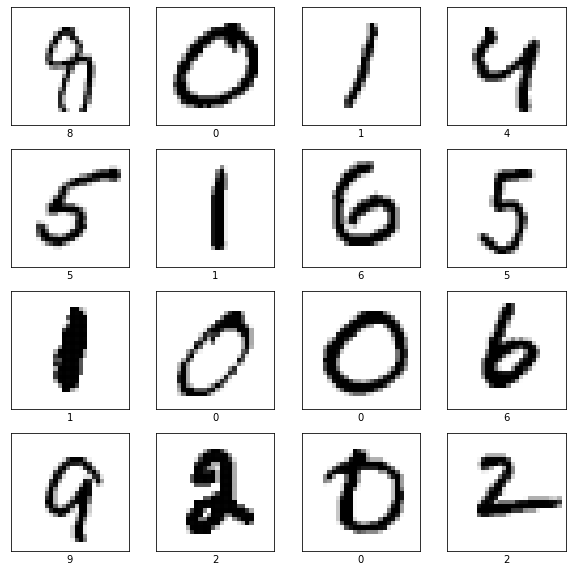

In [6]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

**1.2 Simple Fully connected Neural Network for Handwritten Digit Classification**

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

![alt_text](https://gitlab.cs.washington.edu/arjonal/eep523/raw/6ab437ff42651b65889623bc7b538c4f168f055c/mnist_fig.png?inline=false "CNN Architecture for MNIST Classification")


To define the architecture of this first **fully connected neural network**, we'll use the Keras API and define the model using the Sequential class. Note how we first use a Flatten layer, which flattens the input so that it can be fed into the model.


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.




In [7]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the number of neurons for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      # '''TODO: Define the number of neurons of the second Dense layer to output the classification probabilities'''
      # [hint: use same syntact as previous layer but different number of neurons]
      
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      
  ])
  return fc_model

model = build_fc_model()

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. *Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model. *



That defines our fully connected model!

**1.3 Training the model**

Before training the model, we need to define a few more settings. These are added during the model's compile step:

**Loss function** — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.

**Optimizer** — This defines how the model is updated based on the data it sees and its loss function.

**Metrics** — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of **0.1**. Since we are performing a categorical classification task, we'll want to use the cross entropy loss.

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model.

In [8]:
#'''TODO: Experiment with different learning rates
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training.

We can use GradientTape to optimize losses and train models with stochastic gradient descent. After defining the model settings in the compile step, we can also accomplish training by calling the fit method on an instance of the Model class. We will use this to train our fully connected model

As the model trains, the loss and accuracy metrics are displayed. 

In [9]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 2000
EPOCHS = 20

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - ETA: 6s - loss: 2.4212 - accuracy: 0.09 - ETA: 0s - loss: 2.1145 - accuracy: 0.33 - ETA: 0s - loss: 1.8412 - accuracy: 0.50 - ETA: 0s - loss: 1.6213 - accuracy: 0.58 - 0s 7us/sample - loss: 1.4900 - accuracy: 0.6298
Epoch 2/20
60000/60000 [==============================] - ETA: 0s - loss: 0.8935 - accuracy: 0.80 - ETA: 0s - loss: 0.8212 - accuracy: 0.82 - ETA: 0s - loss: 0.7661 - accuracy: 0.83 - ETA: 0s - loss: 0.7235 - accuracy: 0.83 - 0s 3us/sample - loss: 0.7102 - accuracy: 0.8402
Epoch 3/20
60000/60000 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.85 - ETA: 0s - loss: 0.5712 - accuracy: 0.85 - ETA: 0s - loss: 0.5482 - accuracy: 0.86 - 0s 3us/sample - loss: 0.5331 - accuracy: 0.8675
Epoch 4/20
60000/60000 [==============================] - ETA: 0s - loss: 0.4931 - accuracy: 0.87 - ETA: 0s - loss: 0.4800 - accuracy: 0.87 - ETA: 0s - loss: 0.4689 - accuracy: 0.87 - 0s 3us/sample

**Evaluate accuracy on the test dataset**

Now that we've trained the model, we can ask it to make predictions about a test set that it hasn't seen before. In this example, the test_images array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the test_labels array.

Use the evaluate method to evaluate the model on the test dataset!

In [10]:
# test the model
print("hello")
test_loss, test_acc = model.evaluate(test_images, test_labels) 

print('Test accuracy:', test_acc)

hello
10000/10000 [==============================] - ETA: 20s - loss: 0.2241 - accuracy: 0.968 - ETA: 0s - loss: 0.3086 - accuracy: 0.909 - ETA: 0s - loss: 0.3288 - accuracy: 0.90 - ETA: 0s - loss: 0.3296 - accuracy: 0.90 - ETA: 0s - loss: 0.3051 - accuracy: 0.91 - ETA: 0s - loss: 0.2854 - accuracy: 0.92 - ETA: 0s - loss: 0.2602 - accuracy: 0.92 - 0s 42us/sample - loss: 0.2547 - accuracy: 0.9286
Test accuracy: 0.9286


You may observe that the accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*, when a machine learning model performs worse on new data than on its training data. 

What is the highest accuracy you can achieve with this first fully connected model? Since the handwritten digit classification task is pretty straightforward, you may be wondering how we can do better...

![Deeper...](https://i.kym-cdn.com/photos/images/newsfeed/000/534/153/f87.jpg)

### Answers for part 1

#### a. Why the training data is divided by 255?
    Data values were divided by 255 to normalize the data between 0 and 1
    
#### b. Which values did you select for the epochs, batch size, and learning rate? Why?
    batch size, learning rate and epoch were chosen so that we had the smallest possible loss when running.
    
    Large learning rate: Converges much faster than smaller rates, however gradient can increase and generate oscillation. Additionally, it may converge to sub-optimal weights (jumping over minima)
    
    Small learning rate: Makes sure that it will not jump over minima, however, takes too long to coverge and may get stuck on local minimum instead of global
    
    Epoch number should be enough to converge and the loss change is minimal
    
    Lastly, the batch size impacts the number of iterations, therefore a very small batch size will converge quickly but could not be a sub-optimal minima. In contrast, using a very large batch size, like the size of the dataset, would find global minima but would be more computational intense.

#### c. How do you think this fully-connected model could be improved? Why that solution?
    Maybe add more layers on the model for improvment.

# Part 2: Convolutional Neural Network (CNN) for handwritten digit classification


As we saw in lecture, convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:

![alt_text](https://gitlab.cs.washington.edu/arjonal/eep523/raw/master/convnet_fig.png?inline=false "CNN Architecture for MNIST Classification")


We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: you can use keras.layers.Conv2D to define convolutional layers and keras.layers.MaxPool2D to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model.

**'''TODO'''**

**Complete the model definition below, by entereing the missing parameters. You can find all the solutions by looking at the picture above**

In [11]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     
        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
       

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
   

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  115328    
_________________________________________________________________
dense_3 (Dense)              multiple                 

Train and test the CNN model
Now, as before, we can define the loss function, optimizer, and metrics through the compile method. Compile the CNN model with an optimizer and learning rate of choice:



In [12]:
'''TODO: Define the learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.


To start training, we can call the model.fit method—so called because it "fits" the model to the training data:

As was the case with the fully connected model, we can train our CNN using the fit method via the Keras API

In [13]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - ETA: 18s - loss: 2.3144 - accuracy: 0.096 - ETA: 11s - loss: 2.2060 - accuracy: 0.225 - ETA: 9s - loss: 2.0801 - accuracy: 0.278 - ETA: 8s - loss: 2.0066 - accuracy: 0.31 - ETA: 7s - loss: 1.9072 - accuracy: 0.35 - ETA: 6s - loss: 1.7917 - accuracy: 0.40 - ETA: 5s - loss: 1.6715 - accuracy: 0.45 - ETA: 5s - loss: 1.5498 - accuracy: 0.49 - ETA: 5s - loss: 1.4378 - accuracy: 0.52 - ETA: 4s - loss: 1.3480 - accuracy: 0.56 - ETA: 4s - loss: 1.2690 - accuracy: 0.58 - ETA: 4s - loss: 1.2005 - accuracy: 0.60 - ETA: 3s - loss: 1.1359 - accuracy: 0.63 - ETA: 3s - loss: 1.0785 - accuracy: 0.65 - ETA: 3s - loss: 1.0250 - accuracy: 0.66 - ETA: 3s - loss: 0.9774 - accuracy: 0.68 - ETA: 2s - loss: 0.9348 - accuracy: 0.69 - ETA: 2s - loss: 0.8938 - accuracy: 0.71 - ETA: 2s - loss: 0.8565 - accuracy: 0.72 - ETA: 2s - loss: 0.8245 - accuracy: 0.73 - ETA: 1s - loss: 0.7943 - accuracy: 0.74 - ETA: 1s - loss: 0.7665 - accurac

60000/60000 [==============================] - ETA: 5s - loss: 0.0187 - accuracy: 0.99 - ETA: 5s - loss: 0.0194 - accuracy: 0.99 - ETA: 5s - loss: 0.0183 - accuracy: 0.99 - ETA: 4s - loss: 0.0177 - accuracy: 0.99 - ETA: 4s - loss: 0.0177 - accuracy: 0.99 - ETA: 4s - loss: 0.0169 - accuracy: 0.99 - ETA: 4s - loss: 0.0166 - accuracy: 0.99 - ETA: 4s - loss: 0.0165 - accuracy: 0.99 - ETA: 3s - loss: 0.0170 - accuracy: 0.99 - ETA: 3s - loss: 0.0167 - accuracy: 0.99 - ETA: 3s - loss: 0.0167 - accuracy: 0.99 - ETA: 3s - loss: 0.0164 - accuracy: 0.99 - ETA: 3s - loss: 0.0168 - accuracy: 0.99 - ETA: 3s - loss: 0.0171 - accuracy: 0.99 - ETA: 2s - loss: 0.0173 - accuracy: 0.99 - ETA: 2s - loss: 0.0172 - accuracy: 0.99 - ETA: 2s - loss: 0.0170 - accuracy: 0.99 - ETA: 2s - loss: 0.0169 - accuracy: 0.99 - ETA: 2s - loss: 0.0171 - accuracy: 0.99 - ETA: 1s - loss: 0.0168 - accuracy: 0.99 - ETA: 1s - loss: 0.0167 - accuracy: 0.99 - ETA: 1s - loss: 0.0170 - accuracy: 0.99 - ETA: 1s - loss: 0.0171 - accu

60000/60000 [==============================] - ETA: 5s - loss: 0.0045 - accuracy: 0.99 - ETA: 5s - loss: 0.0076 - accuracy: 0.99 - ETA: 5s - loss: 0.0081 - accuracy: 0.99 - ETA: 4s - loss: 0.0072 - accuracy: 0.99 - ETA: 4s - loss: 0.0066 - accuracy: 0.99 - ETA: 4s - loss: 0.0061 - accuracy: 0.99 - ETA: 4s - loss: 0.0059 - accuracy: 0.99 - ETA: 4s - loss: 0.0056 - accuracy: 0.99 - ETA: 4s - loss: 0.0059 - accuracy: 0.99 - ETA: 3s - loss: 0.0058 - accuracy: 0.99 - ETA: 3s - loss: 0.0058 - accuracy: 0.99 - ETA: 3s - loss: 0.0059 - accuracy: 0.99 - ETA: 3s - loss: 0.0058 - accuracy: 0.99 - ETA: 3s - loss: 0.0057 - accuracy: 0.99 - ETA: 2s - loss: 0.0058 - accuracy: 0.99 - ETA: 2s - loss: 0.0056 - accuracy: 0.99 - ETA: 2s - loss: 0.0057 - accuracy: 0.99 - ETA: 2s - loss: 0.0056 - accuracy: 0.99 - ETA: 2s - loss: 0.0058 - accuracy: 0.99 - ETA: 1s - loss: 0.0056 - accuracy: 0.99 - ETA: 1s - loss: 0.0057 - accuracy: 0.99 - ETA: 1s - loss: 0.0059 - accuracy: 0.99 - ETA: 1s - loss: 0.0058 - accu

60000/60000 [==============================] - ETA: 5s - loss: 0.0013 - accuracy: 1.00 - ETA: 5s - loss: 0.0010 - accuracy: 1.00 - ETA: 5s - loss: 0.0016 - accuracy: 0.99 - ETA: 4s - loss: 0.0026 - accuracy: 0.99 - ETA: 4s - loss: 0.0035 - accuracy: 0.99 - ETA: 4s - loss: 0.0035 - accuracy: 0.99 - ETA: 4s - loss: 0.0034 - accuracy: 0.99 - ETA: 4s - loss: 0.0036 - accuracy: 0.99 - ETA: 3s - loss: 0.0036 - accuracy: 0.99 - ETA: 3s - loss: 0.0036 - accuracy: 0.99 - ETA: 3s - loss: 0.0035 - accuracy: 0.99 - ETA: 3s - loss: 0.0034 - accuracy: 0.99 - ETA: 3s - loss: 0.0034 - accuracy: 0.99 - ETA: 2s - loss: 0.0036 - accuracy: 0.99 - ETA: 2s - loss: 0.0037 - accuracy: 0.99 - ETA: 2s - loss: 0.0036 - accuracy: 0.99 - ETA: 2s - loss: 0.0036 - accuracy: 0.99 - ETA: 2s - loss: 0.0036 - accuracy: 0.99 - ETA: 2s - loss: 0.0036 - accuracy: 0.99 - ETA: 1s - loss: 0.0037 - accuracy: 0.99 - ETA: 1s - loss: 0.0037 - accuracy: 0.99 - ETA: 1s - loss: 0.0038 - accuracy: 0.99 - ETA: 1s - loss: 0.0038 - accu

Make predictions with the CNN model
With the model trained, we can use it to make predictions about some images. The predict function call generates the output predictions given a set of input samples.

In [14]:
predictions = cnn_model.predict(test_images)

With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset

In [15]:
predictions[0]

array([2.50325802e-11, 1.21390450e-11, 1.82668702e-09, 1.61304355e-11,
       1.84476090e-09, 3.92016301e-14, 1.07246175e-17, 1.00000000e+00,
       3.38905813e-12, 2.47058589e-11], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits.

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [16]:
#We know identigy the digit with the highest confidence prediction for the first image in the test dataset. 
prediction = np.argmax(predictions[0]) 


print(prediction)

7


So, the model is most confident that this image is a "(?)". (find out) 
We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

Label of this digit is: 7


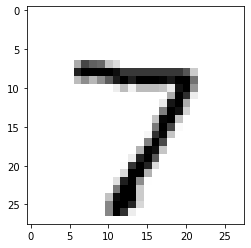

In [17]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

In [18]:
def plot_image_prediction(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_prediction(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



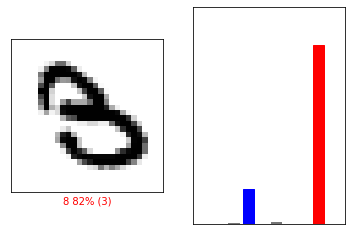

In [29]:
image_index = 18 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_prediction(image_index, predictions,  test_labels)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

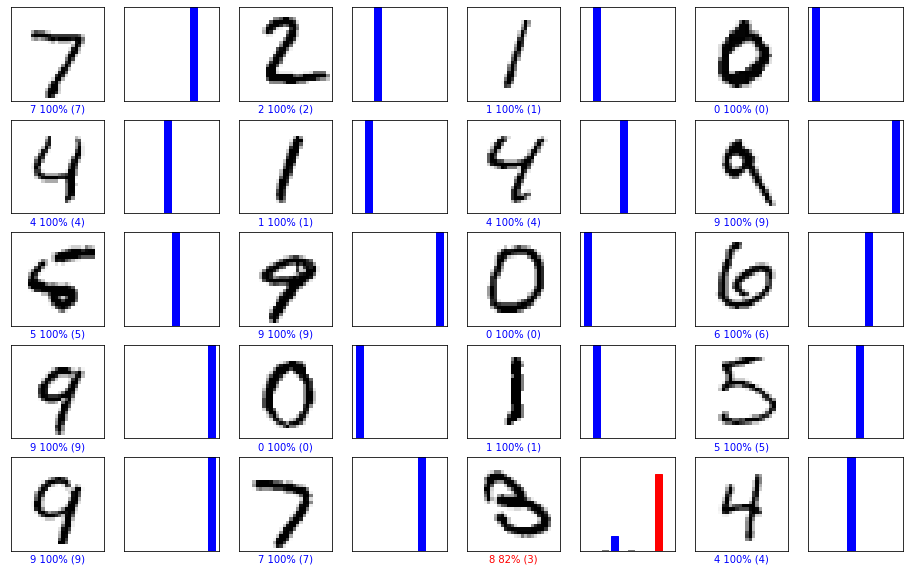

In [21]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_prediction(i, predictions, test_labels)

### 2. Answers
#### a. What is the digit that has the highest confidence for the second image in the dataset?
    It seems all digits have the highest confidence except digit 3 in our dataset.
#### b. How do you think this CNN model could be improved? Why?
    I think we can add more layers to the model for deeper learning.

# Part 3: Save model and convert to TensorFlow Lite



In [22]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
#Give the model your group number if you want to get points for your assignment grade
#The colde below is made for a group number 99 - change that for your group number
model_group5 = converter.convert()

# Show model size in KBs.
float_model_size = len(model_group5) / 1024
print('Float model size = %dKBs.' % float_model_size)

Float model size = 489KBs.


In [25]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
model_group5_quant = converter.convert()

# Show model size in KBs.
quantized_model_size = len(model_model_group5_quant) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

Quantized model size = 125KBs,
which is about 25% of the float model size.


In [28]:
# Save the quantized model to file to the Downloads directory
f = open('model_group5_Q.tflite', "wb")
f.write(model_group5_quant)
f.close()

# Download the digit classification model
# from google.colab import files
# files.download('model_group5_Q.tflite')

print('`model_group5_quant.tflite` has been downloaded')

`model_group5_quant.tflite` has been downloaded


# Part 4: Android App -> Discussed in class



